# MACHINE LEARNING IN 6 HOURS

#    # LINEAR REGRESSION

Linear regression is a statistical method that helps find the relationsship between an independent and dependent variable, both of which are continuous

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import style
warnings.filterwarnings('ignore')
style.use('fivethirtyeight')

%matplotlib inline

In [3]:
#importing the dataset and extracting the independent and dependent variables
housing  = pd.read_csv("~/Documents/datasets/housing.csv")
cols = list(housing.columns.values)

# we shift what we want to predict to the extreme end of the table 
#be careful when hardcoding numbers fordata that can change
housing = housing[cols[0:7] + [cols[-1]] + cols[7:9]]
housing = housing.drop("total_bedrooms", axis=1)
#X is no longer a dataframe ,but a bunch of arrays
X = housing.iloc[:,:-1].values
y = housing.iloc[:, 8].values
#print to check if y is the median_house value(which we want to predict
print(housing.isnull().sum())
print(y)
housing.head()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
ocean_proximity       0
median_income         0
median_house_value    0
dtype: int64
[452600. 358500. 352100. ...  92300.  84700.  89400.]


,longitude,latitude,housing_median_age,total_rooms,population,households,ocean_proximity,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,NEAR BAY,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,NEAR BAY,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,NEAR BAY,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,NEAR BAY,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,NEAR BAY,3.8462,342200.0


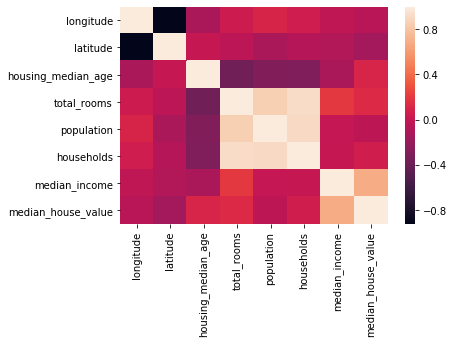

<Figure size 1080x720 with 0 Axes>

In [4]:
# Data visualisation
# Building the Correlation matrix
sns.heatmap(housing.corr())
plt.figure(figsize=(15,10))
plt.show()

In [10]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
X[:, 6] = labelencoder.fit_transform(X[:, 6])

onehotencoder = OneHotEncoder(categorical_features = [6])
X = onehotencoder.fit_transform(X).toarray()


In [9]:
#Remove an extra column brought about by encoding
X = X[:,1:]

In [13]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size = 0.2,random_state = 0)

In [14]:
#Fitting Multiple linear regression into the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
y_pred = regressor.predict(X_test)
print(y_pred)

[226360.91786771 292299.93978031 181579.0660915  ...  97177.25895442
 256622.57036843 239652.42254986]


In [16]:
# Calculating the coefficients
print(regressor.coef_)

[-3.93710673e+03  3.93710673e+03  2.49245400e+03  7.15830298e+03
 -3.59151964e+03  1.05909804e+04  9.00075815e+03  6.40028165e+03
  2.62864576e+03  1.03244055e+04  1.45535480e+04  7.76908058e+03
  1.44215362e+04  1.55142021e+04  9.12064744e+03  6.65915664e+03
  1.38808457e+04  1.78348864e+04  2.13700000e+04  2.52578574e+04
  1.88328502e+04  2.77890833e+04  2.03633144e+04  2.45514150e+04
  2.97750713e+04  2.06442186e+04  2.31202297e+04  3.08425725e+04
  2.85038114e+04  2.81798751e+04  3.25145840e+04  2.95945148e+04
  2.53822406e+04  2.80446204e+04  2.21323709e+04  2.08433114e+04
  2.60067848e+04  2.83828627e+04  4.07541071e+04  3.99533601e+04
  3.87912926e+04  2.63154473e+04  3.41547271e+04  4.05056639e+04
  3.38654833e+04  3.45273412e+04  2.06278873e+04  4.52443686e+04
  4.14555328e+04  3.92362968e+04  5.56219113e+04  7.69701825e+04
 -4.12363545e+04  1.45688418e+05 -8.94907226e+03  4.78919022e+03
 -2.58840903e+04 -2.50322448e+04 -1.28741330e-01 -4.05156656e+01
  1.31272349e+02  3.73351

In [17]:
#Calculate the intercept
print(regressor.intercept_)

-2157062.307693396


In [18]:
#Calculate r squared score to check validity of model(it better be 0.9 or more)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6384060621816523

As you see,.63 is not good enough .Looks like we got a lot of work to do to improve our model

# #LOGISTIC REGRESSION

Here ,we'll train our model to recognize digits

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [20]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


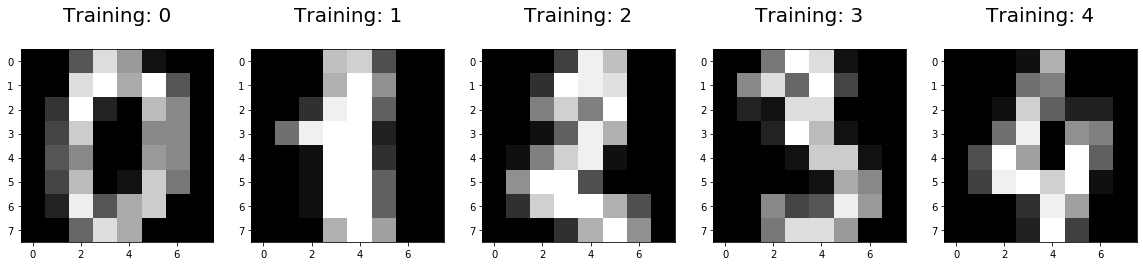

In [23]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1, 5,index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title("Training: %i\n" % label,fontsize = 20)

In [28]:
X_train,X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size = 0.23, random_state = 2)

In [29]:
print(X_train.shape)

(1383, 64)


In [31]:
print(y_train.shape)

(1383,)


In [32]:
print(X_test.shape)

(414, 64)


In [33]:
print(y_test.shape)

(414,)


In [35]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# Returns a NumPy array
# Predict for one Observation(image)

print(logisticReg.predict(X_test[0].reshape(1,-1)))

[4]


In [46]:
predictions = logisticReg.predict(X_test)
score = logisticReg.score(X_test,y_test)
print(score)

0.9420289855072463


In [47]:
#Note the more numbers in the diagonal the more accurate the model
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


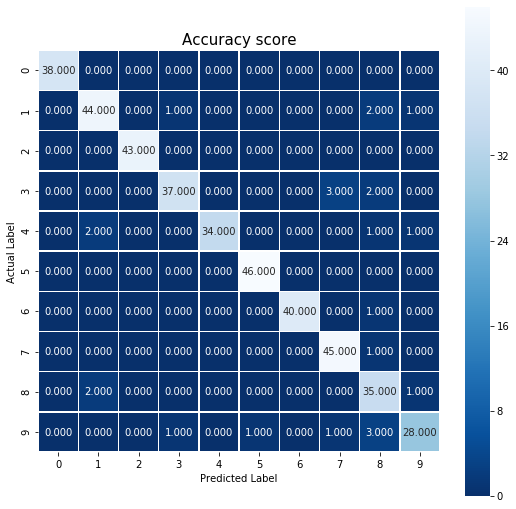

In [49]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True,fmt = ".3f",linewidths=.5, square= True, cmap = 'Blues_r');
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy score'.format(score)
plt.title(all_sample_title, size = 15);


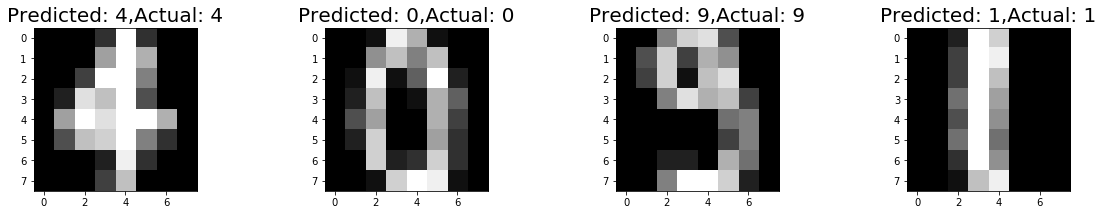

In [51]:
index = 0
classifiedIndex = []

for predict, actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], ([8,8])), cmap = plt.cm.gray)
    plt.title("Predicted: {},Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)

# #KMEANS CLUSTERING

Here's how it works:
    A number ,k, of data points also called centroids are assigned    randomly(assuming we have an x,y plane of data points)
    The Euclidean distance is used to find out which centroid is closest to each data point and the data points are assigned to the corresponding centroids

KMeans uses distance measure
    Distance measure will determine the similarity between two      elements and it will influence the shape of clusters

    Examples of this include: Euclidean distance measure,manhattan distance measure,squared euclidean distance measure,cosine distance measure

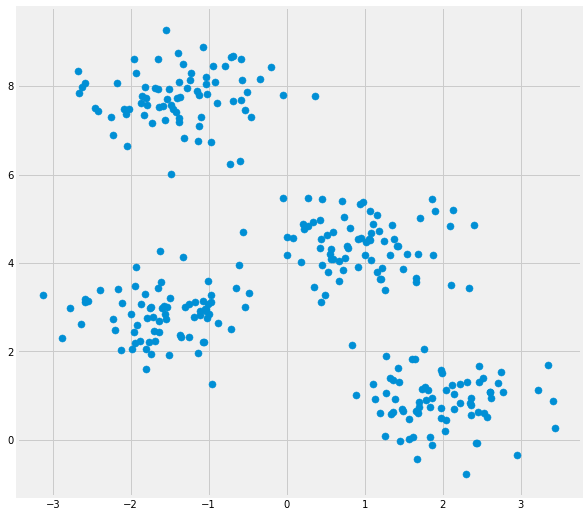

In [3]:
from sklearn.datasets.samples_generator import make_blobs
#make some random data points
X, y_true = make_blobs(n_samples=300, centers =4,cluster_std=0.600,random_state=0)
plt.figure(figsize = (9,9))
plt.scatter(X[:,0],X[:, 1],s=50)
plt.show()



#possible application(cluster students according to their average marks in arts(y axis) and in sciences(x axis))

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#cluster numbers assigned for each observation/instance(clusters go from 0 to 3)
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

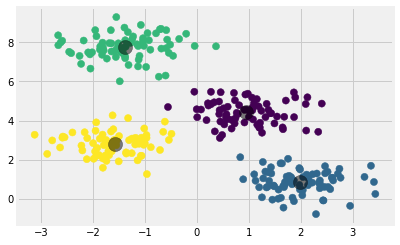

In [5]:
# A simplified implementation of the Kmeans clustering algorithm
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters,rseed =2):
    #1.Randomly choose clusters 
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #infinite loop that becomes disastrous if the centers fail to
        #converge
        # 2a. Assign labels based on the closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from mean points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        #2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)

plt.scatter(X[:, 0], X[:, 1],c = y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200,alpha=0.5);
        
        
    

USE CASE: KMEANS FOR COLOR COMPRESSION


    PROBLEM STATEMENT

        To perform color compression on images using K-Means algorithm

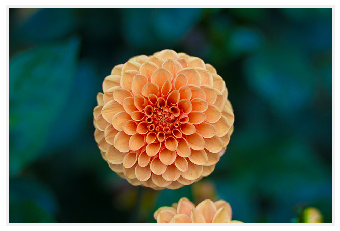

In [16]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[] )
ax.imshow(china);

In [17]:
china.shape

(427, 640, 3)

In [18]:
data = china / 255.0 # use 0..1 scale
data = data.reshape(427 * 640,3)
data.shape

(273280, 3)

In [32]:
def plot_pixels(data, title,colors=None ,N=10000):
    if colors is None:
        colors = data
        
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1, 2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel = 'Red',ylabel = 'Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)

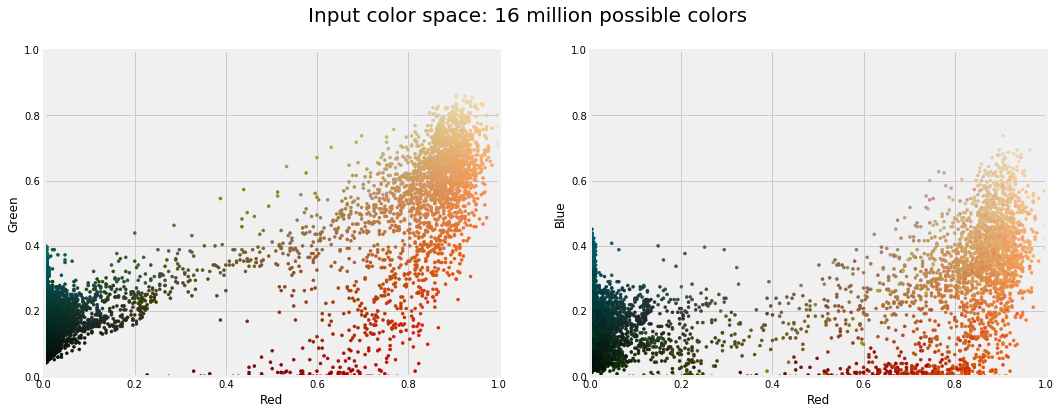

In [33]:
plot_pixels(data, title='Input color space: 16 million possible colors')

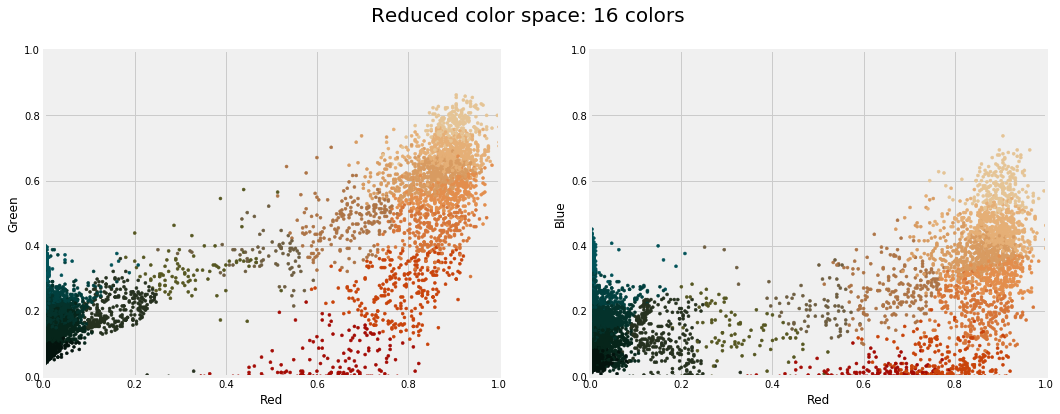

In [35]:
import warnings; warnings.simplefilter('ignore') # Fix NumPy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
           title="Reduced color space: 16 colors")

In [ ]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6),
                      subplot_kw=dict(xtick=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title()